In [1]:
import shift_detector
from shift_detector.detector import Detector
from shift_detector.checks.simple_check import SimpleCheck
from shift_detector.checks.distinction_check import DistinctionCheck
from shift_detector.checks.sorensen_dice_check import SorensenDiceCheck
from shift_detector.checks.conditional_probabilities_check import ConditionalProbabilitiesCheck
from shift_detector.checks.embedding_distance_check import EmbeddingDistanceCheck
from shift_detector.checks.word_prediction_check import WordPredictionCheck
from shift_detector.checks.statistical_checks.numerical_statistical_check import NumericalStatisticalCheck
from shift_detector.checks.statistical_checks.categorical_statistical_check import CategoricalStatisticalCheck
from shift_detector.checks.statistical_checks.text_metadata_statistical_check import TextMetadataStatisticalCheck
from shift_detector.checks.lda_check import LdaCheck

2019-06-19 15:33:56,722 [INFO]  'pattern' package not found; tag filters are not available for English
Using TensorFlow backend.


In [2]:
import pandas as pd
'''
df1 = './../train_ascii.csv'
df1 = pd.read_csv(df1, delimiter=';').sample(100)
df2 = './../audits_ascii.csv'
df2 = pd.read_csv(df2, delimiter=';')
'''

df = pd.read_csv('./data/pokedex.csv')
df1 = df.head(300)
df2 = df.tail(721-300)
'''
sales1 = {'brand': ["Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [150., 200., 50., 10., 5., 150., 200., 50., 10., 5., 1.] * 10,
         'payment2': [15., 2., 5., 0., 5., 3., 200., 50., 10., 5., 1.] * 10,
         'description': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] * 10}

sales2 = {'brand': ["Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [10, 5, 150, 200, 50, 10, 5, 1] * 10,
         'payment2': [15, 2, 5, 0, 5, 3, 200, 50] * 10,
         'description': ["D", "E", "F", "G", "H", "I", "J", "K"] * 10}

df1 = pd.DataFrame.from_dict(sales1)
df2 = pd.DataFrame.from_dict(sales2)
'''

'\nsales1 = {\'brand\': ["Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",\n                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",\n                   "Jones LLC"] * 10,\n         \'payment\': [150., 200., 50., 10., 5., 150., 200., 50., 10., 5., 1.] * 10,\n         \'payment2\': [15., 2., 5., 0., 5., 3., 200., 50., 10., 5., 1.] * 10,\n         \'description\': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] * 10}\n\nsales2 = {\'brand\': ["Blue Inc", "Alpha Co",\n                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",\n                   "Jones LLC"] * 10,\n         \'payment\': [10, 5, 150, 200, 50, 10, 5, 1] * 10,\n         \'payment2\': [15, 2, 5, 0, 5, 3, 200, 50] * 10,\n         \'description\': ["D", "E", "F", "G", "H", "I", "J", "K"] * 10}\n\ndf1 = pd.DataFrame.from_dict(sales1)\ndf2 = pd.DataFrame.from_dict(sales2)\n'

In [3]:
df1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Entry
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur can be seen napping in bright sunlig...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,There is a bud on this Pokémon’s back. To supp...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,There is a large flower on Venusaur’s back. Th...
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,The flame that burns at the tip of its tail is...
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Charmeleon mercilessly destroys its foes using...
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Charizard flies around the sky in search of po...
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Squirtle’s shell is not merely used for protec...
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,"Its tail is large and covered with a rich, thi..."
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,Blastoise has water spouts that protrude from ...
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,Perhaps because it would like to grow up\nquic...


In [4]:
df2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Entry
300,301,Delcatty,Normal,NaN,380,70,65,65,55,55,70,3,False,Delcatty sleeps anywhere it wants without keep...
301,302,Sableye,Dark,Ghost,380,50,75,75,65,65,50,3,False,It digs through the ground with its hard claws...
302,303,Mawile,Steel,Fairy,380,50,85,85,55,55,50,3,False,"A cunning and terrifying Pokémon, its cuteness..."
303,304,Aron,Steel,Rock,330,50,70,100,40,40,30,3,False,Aron has a body of steel. With one all-out cha...
304,305,Lairon,Steel,Rock,430,60,90,140,50,50,40,3,False,Lairon feeds on iron contained in rocks and wa...
305,306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False,Aggron is protective of its environment. If it...
306,307,Meditite,Fighting,Psychic,280,30,40,55,40,55,60,3,False,Meditite heightens its inner energy through me...
307,308,Medicham,Fighting,Psychic,410,60,60,75,60,75,80,3,False,"Through the power of meditation, Medicham deve..."
308,309,Electrike,Electric,NaN,295,40,45,40,65,40,65,3,False,Friction between the air and its fur produces\...
309,310,Manectric,Electric,NaN,475,70,75,60,105,60,105,3,False,Manectric can be found beneath unnatural\nthun...


In [5]:
from shift_detector.utils.column_management import ColumnType
custom_column_types = {
    'Legendary': ColumnType.categorical,
    'Type 1': ColumnType.categorical,
    'Type 2': ColumnType.categorical,
    'Generation': ColumnType.categorical
}
detector = Detector(df1, df2, **custom_column_types)

Numerical columns: #, HP, Attack, Total, Sp. Atk, Speed, Sp. Def, Defense
Categorical columns: Type 1, Type 2, Generation, Legendary
Text columns: Name, Entry
Used columns: #, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, Entry


In [6]:
sc = SimpleCheck()
dc = DistinctionCheck(num_epochs=10, relative_threshold=0.2)
cp = ConditionalProbabilitiesCheck(min_support=0.01, min_confidence=0.01, rule_limit=10,
                                               min_delta_supports=0.01, min_delta_confidences=0.01)
sdc = SorensenDiceCheck(n=1)
edc = EmbeddingDistanceCheck()
# wpc = WordPredictionCheck()
nsc = NumericalStatisticalCheck()
csc = CategoricalStatisticalCheck()
tmc = TextMetadataStatisticalCheck()
# lc = LdaCheck()

In [7]:
import logging

detector.run(sc, sdc, edc, nsc, csc, tmc)

Executing SimpleCheck
- Executing SimplePrecalculation
Executing SorensenDiceCheck
- Executing SorensenDicePrecalculations
- Executing NGram
Executing EmbeddingDistanceCheck
- Executing EmbeddingDistancePrecalculation
- Executing TextEmbeddingPrecalculation
- Executing TokenizeIntoLowerWordsPrecalculation
Executing NumericalStatisticalCheck
Executing CategoricalStatisticalCheck
- Executing LowCardinalityPrecalculation
Executing TextMetadataStatisticalCheck
- Executing TextMetadata
- Executing NumWordsMetadata
- Use already executed TokenizeIntoLowerWordsPrecalculation
- Executing NumCharsMetadata
- Executing DistinctWordsRatioMetadata
- Use already executed TokenizeIntoLowerWordsPrecalculation


# OVERVIEW

Executed 6 checks


,Column,# Checks Failed,# Checks Executed
0,Entry,3,3
1,#,2,2
2,Type 1,2,2
3,HP,2,2
4,Legendary,2,2
5,Generation,2,2
6,Attack,2,2
7,Total,2,2
8,Type 2,2,2
9,Sp. Atk,1,2


# DETAILS

## Simple Check

Examined Columns: ['#', 'Type 1', 'HP', 'Legendary', 'Generation', 'Attack', 'Total', 'Type 2', 'Sp. Atk', 'Speed', 'Sp. Def', 'Defense']
Shifted Columns: ['#', 'Type 1', 'HP', 'Legendary', 'Generation', 'Attack', 'Total', 'Type 2', 'Sp. Atk', 'Speed', 'Sp. Def', 'Defense']

Column '#':
Metric: mean with Diff: +2.4 %
Metric: median with Diff: +2.4 %
Metric: min with Diff: +300.0 %
Metric: max with Diff: +1.4 %
Metric: quartile_1 with Diff: +4.36 %
Metric: quartile_3 with Diff: +1.73 %
Metric: num_distinct with Diff: +0.4 %
Metric: completeness with Diff: +0.4 %
Metric: std with Diff: +0.4 %

Column 'Total':
Metric: median with Diff: +0.12 %
Metric: num_distinct with Diff: +0.47 %
Metric: completeness with Diff: +0.4 %

Column 'HP':
Metric: median with Diff: +0.15 %
Metric: min with Diff: +19.0 %
Metric: max with Diff: -0.33 %
Metric: quartile_1 with Diff: +0.2 %
Metric: num_distinct with Diff: +0.44 %
Metric: completeness with Diff: +0.4 %
Metric: std with Diff: -0.22 %

Column 'Attack

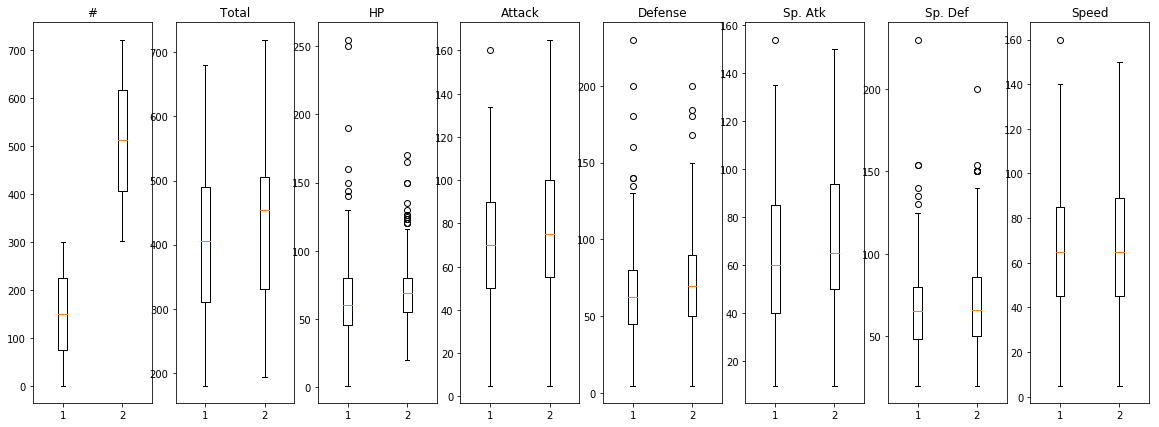

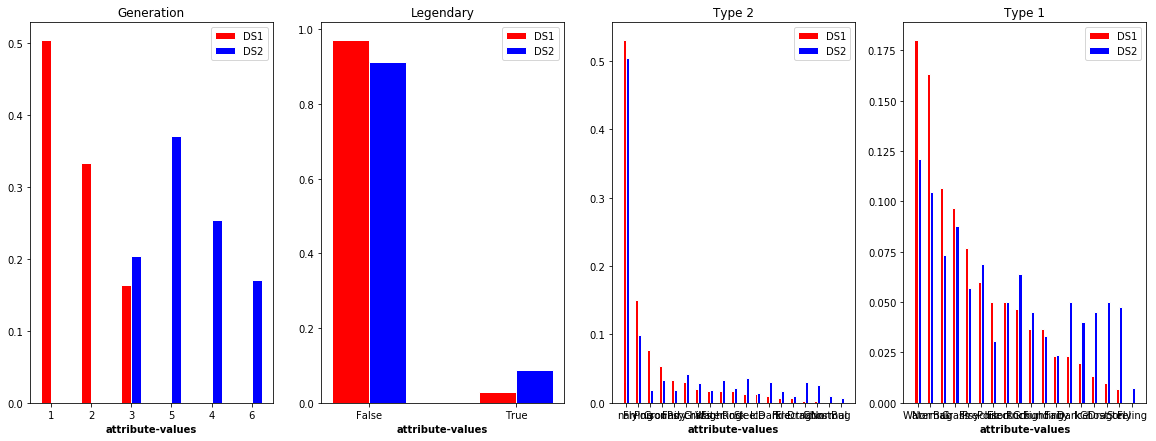

## Sorensen Dice Check

Examined Columns: ['Name', 'Entry']
Shifted Columns: ['Name', 'Entry']

Column 'Name':
	Baseline in Dataset1: 0.866617898073641
	Baseline in Dataset2: 0.8466570927078348
	Sorensen Dice Coefficient between Datasets: 0.943198550143889
Column 'Entry':
	Baseline in Dataset1: 0.9649234995973665
	Baseline in Dataset2: 0.9658929980649276
	Sorensen Dice Coefficient between Datasets: 0.8767206447118984




## Embedding Distance Check

Examined Columns: ['Name', 'Entry']
Shifted Columns: ['Entry']

Column 'Name':
	Baseline in Dataset1: 0.013208864859139554
	Baseline in Dataset2: 0.016506437699505466
	Distance between Datasets: 0.0074878627993158735
Column 'Entry':
	Baseline in Dataset1: 10.465776153129255
	Baseline in Dataset2: 2.483189721869874
	Distance between Datasets: 16.99388661742583




## Statistical Check

Examined Columns: ['#', 'HP', 'Attack', 'Total', 'Sp. Atk', 'Speed', 'Sp. Def', 'Defense']
Shifted Columns: ['#', 'HP', 'Total', 'Attack']

Column '#':
- probability for equal distribution p = pvalue    1.523821e-155
Name: #, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Kolmogorov-Smirnov-Two-Sample-Test
Column 'HP':
- probability for equal distribution p = pvalue    0.002068
Name: HP, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Kolmogorov-Smirnov-Two-Sample-Test
Column 'Total':
- probability for equal distribution p = pvalue    0.000218
Name: Total, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Kolmogorov-Smirnov-Two-Sample-Test
Column 'Attack':
- probability for equal distribution p = pvalue    0.007996
Name: Attack, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Kolmogorov-Smirnov-Two-Sample-Test

Test Result:


,#,HP,Attack,Total,Sp. Atk,Speed,Sp. Def,Defense
pvalue,1.523821e-155,0.002068,0.007996,0.000218,0.053566,0.859003,0.085695,0.03047


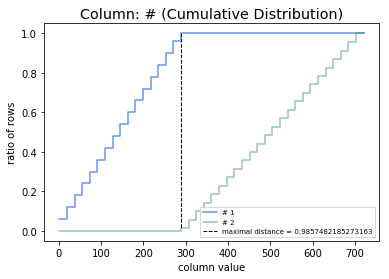

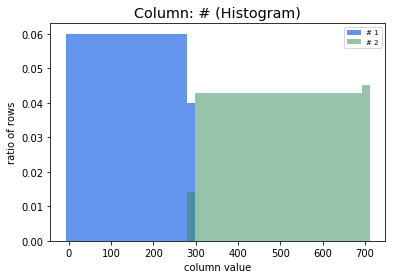

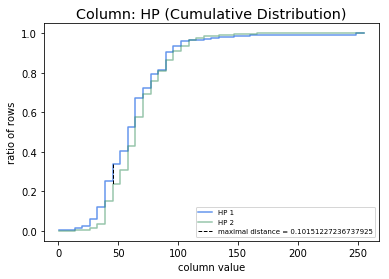

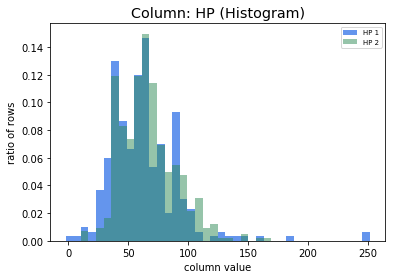

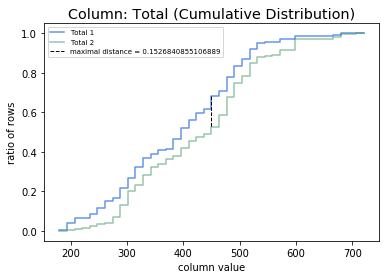

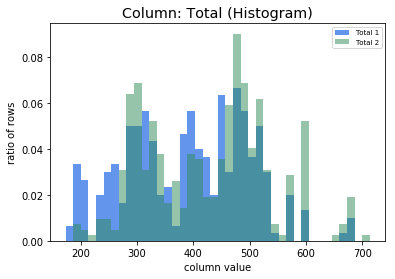

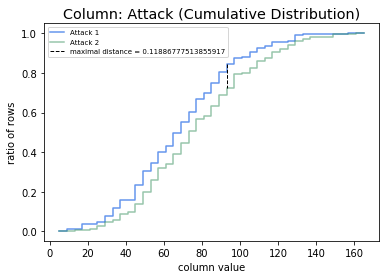

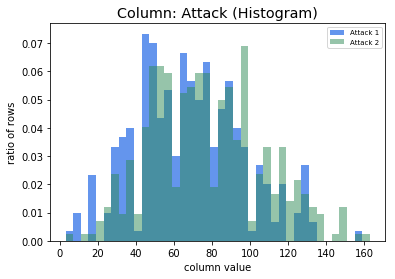

## Statistical Check

Examined Columns: ['Type 1', 'Type 2', 'Generation', 'Legendary']
Shifted Columns: ['Legendary', 'Type 2', 'Generation', 'Type 1']

Column 'Legendary':
- probability for equal distribution p = pvalue    0.002827
Name: Legendary, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Chi^2-Test with Log-Likelihood (G-Test)
Column 'Type 2':
- probability for equal distribution p = pvalue    0.00058
Name: Type 2, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Chi^2-Test with Log-Likelihood (G-Test)
Column 'Generation':
- probability for equal distribution p = pvalue    8.980472e-162
Name: Generation, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Chi^2-Test with Log-Likelihood (G-Test)
Column 'Type 1':
- probability for equal distribution p = pvalue    0.000282
Name: Type 1, dtype: float64
- specified significance level alpha = 0.01
- statistical test performed: Chi^2-Test

,Type 1,Type 2,Generation,Legendary
pvalue,0.000282,0.00058,8.980472e-162,0.002827


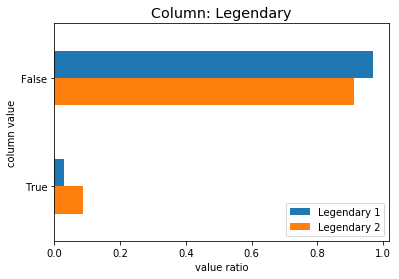

/Users/pzimme/Documents/projects/deequ/shift-detector/shift_detector/checks/statistical_checks/categorical_statistical_check.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  axis=1).sort_index()


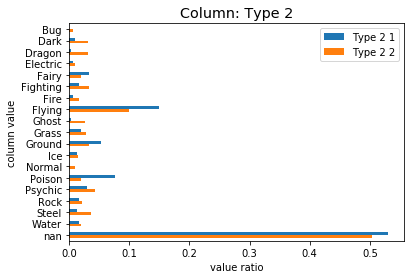

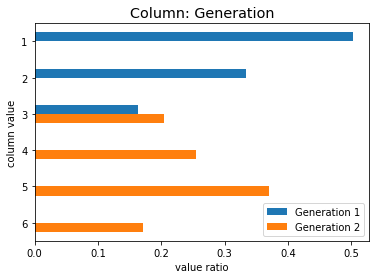

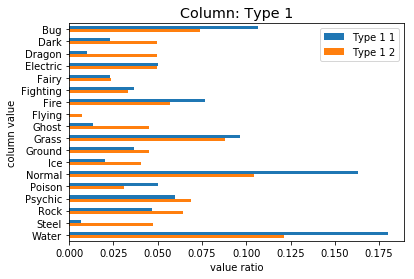

## Text Metadata Check

Examined Columns: ['Entry', 'Name']
Shifted Columns: ['Entry']

Column 'Entry':
Text metadata metrics on column 'Entry' are unlikely to be equally distributed.
num_chars
num_words
distinct_words

Test Result:


column             Name                              Entry                \
metadata distinct_words num_chars num_words distinct_words     num_chars   
pvalue              1.0  0.705366  0.987243       0.001538  5.428843e-29   

column                  
metadata     num_words  
pvalue    1.041844e-26

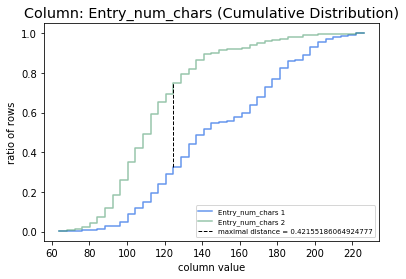

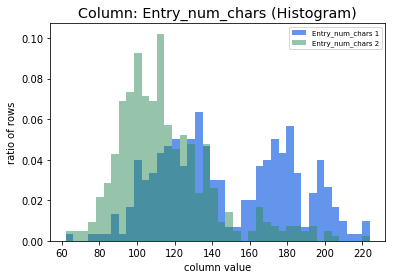

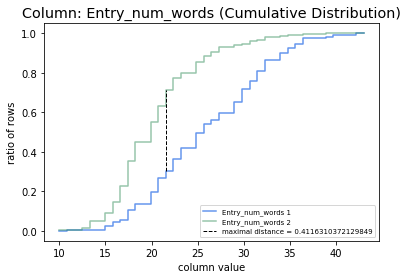

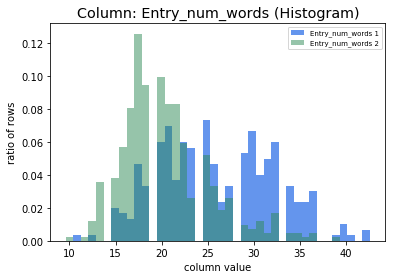

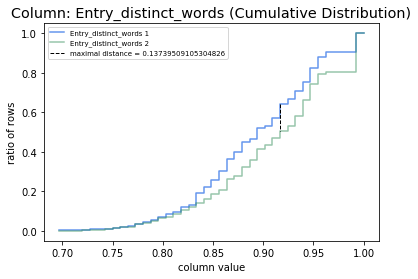

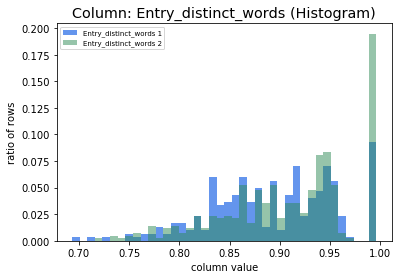

In [8]:
detector.evaluate()